In [981]:
%matplotlib inline
%matplotlib notebook
%pylab inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

path = ('prueba_3.csv')
col_names = ['CARRERA', 'SEXO', 'EDAD', 'ESTADO CIVIL', 'PRIMARIA', 'SECUNDARIA', 'PREPARACION', 
             'MODALIDAD INGRESO', 'SOSTENIBILIDAD ECONOMICA', 'MODALIDAD INGRESO ECONOMICO', 'TRABAJO ESTUDIANTE', 
             'TOTAL INGRESO', 'DEPENDENCIA ECONOMICA', 'RIESGO FAMILIAR', 'FAMILIAR ENFERMO', 'ENFERMEDAD ESTUDIANTE'
            , 'PROMEDIO', 'CLASIFICACION', 'AMONESTACIONES', 'TERCIO', 'QUINTO', 'DESERTO']
pima = pd.read_csv(path, header=None, names=col_names)
#pima.head

Populating the interactive namespace from numpy and matplotlib


In [989]:
feature_cols = ['CARRERA', 'SEXO', 'EDAD', 'ESTADO CIVIL', 'PRIMARIA', 'SECUNDARIA', 'PREPARACION', 
             'MODALIDAD INGRESO', 'SOSTENIBILIDAD ECONOMICA', 'MODALIDAD INGRESO ECONOMICO', 'TRABAJO ESTUDIANTE', 
             'TOTAL INGRESO', 'DEPENDENCIA ECONOMICA', 'RIESGO FAMILIAR', 'FAMILIAR ENFERMO', 'ENFERMEDAD ESTUDIANTE',
               'PROMEDIO', 'CLASIFICACION', 'AMONESTACIONES', 'TERCIO', 'QUINTO']
X = pima[feature_cols]
y = pima.DESERTO

In [990]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [991]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [992]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(10,7), random_state=42, max_iter=15000)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=15000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [993]:
nn_predictions = nn.predict(X_test)

cm0 = confusion_matrix(y_test, nn_predictions)
print ("Accuracy", metrics.accuracy_score(y_test, nn_predictions))
print ('True', y_test.values[0:23])
print ('Pred', nn_predictions[0:23])
print(nn.batch_size)
print(cm0)

Accuracy 1.0
True [1 1 0 1 1 0 1 0 1]
Pred [1 1 0 1 1 0 1 0 1]
auto
[[3 0]
 [0 6]]


In [994]:
print(nn.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                   [1,1,21,2,1,1,4,2,3,1,1,800,3,1,1,2,15,3,1,2,2],
                  ]))
#[0 1 0 0 0 1 0 1 0 1 0 1 1]-> RESULTADOS VERDADEROS

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [988]:
nn.predict_proba(X_test)[0:23]

array([[0.03994681, 0.96005319],
       [0.17655883, 0.82344117],
       [0.96065515, 0.03934485],
       [0.01798269, 0.98201731],
       [0.08316621, 0.91683379],
       [0.98879947, 0.01120053],
       [0.01618835, 0.98381165],
       [0.9890681 , 0.0109319 ],
       [0.02280191, 0.97719809]])

In [865]:
y_pred_prob = nn.predict_proba(X_test)[:,1]

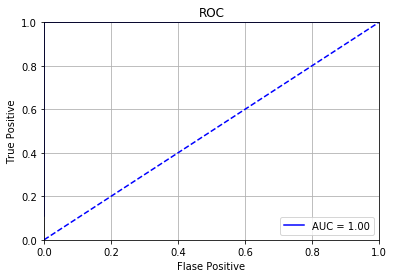

In [866]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
#acu = metrics.roc_auc_score(y_test, y_pred_prob)
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
#plt.show()
plt.plot([0,1],[0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1])
#plt.title('Roc - Clasificación de Deserción')
plt.xlabel('Flase Positive')
plt.ylabel('True Positive')
plt.grid()

Text(0,0.5,'Frecuencia')

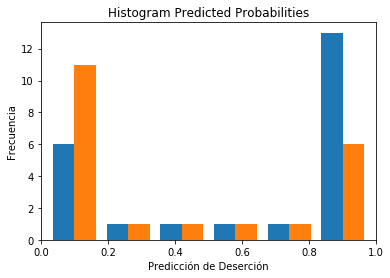

In [867]:
y_pred_prob2 = nn.predict_proba(X_test)[0:23]
plt.hist(y_pred_prob2, bins='auto') 
# arguments are passed to 
np.histogram 
plt.xlim(0,1)
plt.title("Histogram Predicted Probabilities")
plt.xlabel("Predicción de Deserción")
plt.ylabel("Frecuencia")

In [819]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

cm1 = confusion_matrix(y_test, svm_predictions)
print ('True', y_test.values[0:23])
print ('Pred', svm_predictions[0:23])

True [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]
Pred [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]


In [820]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 

cm2 = confusion_matrix(y_test, knn_predictions)
print ('True', y_test.values[0:23])
print ('Pred', knn_predictions[0:23])

True [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]
Pred [1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0]


In [821]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

cm3 = confusion_matrix(y_test, gnb_predictions)
print ('True', y_test.values[0:23])
print ('Pred', gnb_predictions[0:23])

True [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]
Pred [1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0]


In [822]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1).fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

cm4 = confusion_matrix(y_test, lr_predictions)
print ('True', y_test.values[0:23])
print ('Pred', lr_predictions[0:23])

True [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]
Pred [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]


In [823]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=150, n_features=21, n_informative=2, n_redundant=0,
                                      random_state=0, n_classes=2, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

cm5 = confusion_matrix(y_test, rf_predictions)
print ('True', y_test.values[0:23])
print ('Pred', rf_predictions[0:23])
print(cm5)

True [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]
Pred [0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1]
[[9 5]
 [7 2]]


In [824]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
arbol_predictions = arbol.predict(X_test)

cm6 = confusion_matrix(y_test, arbol_predictions)
print ('True', y_test.values[0:23])
print ('Pred', arbol_predictions[0:23])

True [1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0]
Pred [0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1]


In [825]:
print(confusion_matrix(y_test,nn_predictions))
print(confusion_matrix(y_test,svm_predictions))
print(confusion_matrix(y_test,knn_predictions))
print(confusion_matrix(y_test,gnb_predictions))
print(confusion_matrix(y_test,lr_predictions))
print(confusion_matrix(y_test,rf_predictions))
print(confusion_matrix(y_test,arbol_predictions))

[[14  0]
 [ 0  9]]
[[14  0]
 [ 0  9]]
[[11  3]
 [ 1  8]]
[[10  4]
 [ 3  6]]
[[14  0]
 [ 0  9]]
[[9 5]
 [7 2]]
[[9 5]
 [7 2]]


In [826]:
print(classification_report(y_test,nn_predictions))
print(classification_report(y_test,svm_predictions))
print(classification_report(y_test,knn_predictions))
print(classification_report(y_test,gnb_predictions))
print(classification_report(y_test,lr_predictions))
print(classification_report(y_test,rf_predictions))
print(classification_report(y_test,arbol_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        23

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        23

             precision    recall  f1-score   support

          0       0.92      0.79      0.85        14
          1       0.73      0.89      0.80         9

avg / total       0.84      0.83      0.83        23

             precision    recall  f1-score   support

          0       0.77      0.71      0.74        14
          1       0.60      0.67      0.63         9

avg / total       0.70      0.70      0.70        23

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00 

In [827]:
print(nn.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))
#[0 1 0 0 0 1 0 1 0 1 0 1 1]-> RESULTADOS VERDADEROS

print(svm_model_linear.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))
print(knn.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))
print(gnb.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))
print(lr.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))
print(rf.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))
print(arbol.predict([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ]))


#[0 1 0 0 0 1 0 1 0 1 0 1 1]-> RESULTADOS VERDADEROS

#RESULTADOS DE MODELOS
#[1 1 0 0 1 1 1 0 0 1 0 0 1]->ANN
#[0 0 0 0 0 0 0 0 0 0 0 0 0]->SVM
#[1 1 1 1 1 1 1 1 1 1 1 1 1]->KNN
#[0 0 0 0 0 0 0 0 0 0 0 0 0]->GNB
#[0 0 0 0 0 0 0 0 0 0 0 0 0]->LR
#[1 1 1 1 1 1 1 1 1 1 1 0 1]->RF
#[1 1 1 1 1 1 1 1 1 0 0 0 0]->ARBOL

[0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 0 1]
[1 1 1 1 1 1 1 1 1 0 0 0 0]


In [828]:
nn.predict_proba([[1,2,30,1,1,1,4,1,2,1,2,3000,2,1,2,2,13.05,1,0,1,1],
                  [1,1,40,1,1,2,4,1,5,1,1,2000,5,5,2,2,1.55,3,1,2,2],
                   [1,2,17,2,1,1,3,2,3,1,2,650,3,1,2,2,11.8,2,0,1,2],
                   [1,2,17,2,1,1,4,1,3,1,2,1000,3,1,2,2,7.7,3,1,2,2],
                   [1,2,17,2,1,1,4,1,1,1,2,2700,1,4,2,2,9.45,3,1,2,2],
                   [2,1,18,2,2,2,2,1,1,1,2,3800,1,1,2,2,5.1304,3,1,2,2,],
                   [2,1,18,2,1,1,2,1,2,1,2,1950,1,1,2,2,12.087,2,0,2,2],
                   [2,1,37,2,1,1,4,1,5,4,1,600,5,5,2,2,1.0435,3,1,2,2],
                   [2,1,22,2,1,2,4,1,4,1,2,1100,4,1,1,2,14.4348,1,0,1,1],
                   [3,2,17,2,1,2,3,2,1,1,2,1100,1,1,2,2,2.8333,3,1,2,2],
                   [3,2,18,2,1,1,4,2,4,1,2,500,1,1,2,2,14.75,1,0,1,1],
                   [3,2,17,2,1,1,4,1,2,1,2,850,2,1,2,2,13.9583,1,0,1,2],
                   [3,2,17,2,1,1,3,2,3,1,1,950,3,1,1,2,3.5,3,1,2,2],
                  ])
#[0 1 0 0 0 1 0 1 0 1 0 1 1]-> RESULTADOS VERDADEROS

#RESULTADOS DE MODELOS
#[1 1 0 0 1 1 1 0 0 1 0 0 1]->ANN


array([[0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301],
       [0.71934699, 0.28065301]])